In [1]:
%matplotlib notebook

show how a firefly is defined (binary>skeleton, extremeties)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage import measure
import pandas as pd
import json
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
from glob import glob
import os
from pathlib import Path

In [3]:
home_path = os.getcwd()
# To save plot set to True
save_plots = False

In [4]:
data_path = Path('data/10.07.2018_22-38-57_assel/')
os.chdir(home_path)
os.chdir(data_path)
# all the figures will be saved in this folder
target_path = 'plots/Fig1S6/'

In [5]:
raw_images = np.load('sm_raw.npy')
binary_images = np.load('sm_thresh.npy')
skeletons = np.load('sm_skeletons.npy')
# find the data_file.csv to get the distance to source of the centroid
files = [p.replace('\\', '') for p in glob('*')]
for file in files:
    if 'data.csv' in file:
        data = pd.read_csv(file)
heads = np.array((data['Y-Head'], data['X-Head'])).T
tails = np.array((data['Y-Tail'], data['X-Tail'])).T
centroids = np.array((data['Y-Centroid'], data['X-Centroid'])).T
bounding_boxes = np.load('bounding_boxes.npy')
with open('experiment_settings.json') as json_data:
    experiment_data = json.load(json_data)
    
pixel_per_mm = experiment_data['Pixel per mm']

In [6]:
# Which image do we want to use?
image_number = 1418

bounding_boxes[::2,image_number]
actual_centroid = centroids[image_number,:] - np.asarray((bounding_boxes[0,image_number],bounding_boxes[2,image_number]))
actual_head = heads[image_number, :] - np.asarray((bounding_boxes[0,image_number],bounding_boxes[2,image_number]))
actual_tail = tails[image_number, :] - np.asarray((bounding_boxes[0,image_number],bounding_boxes[2,image_number]))

skel_length = int(round(np.nonzero(skeletons[:, :, image_number])[0].shape[0]/2))
midpoint = np.nonzero(skeletons[:, :, image_number])[0][skel_length], \
    np.nonzero(skeletons[:, :, image_number])[1][skel_length],

<IPython.core.display.Javascript object>


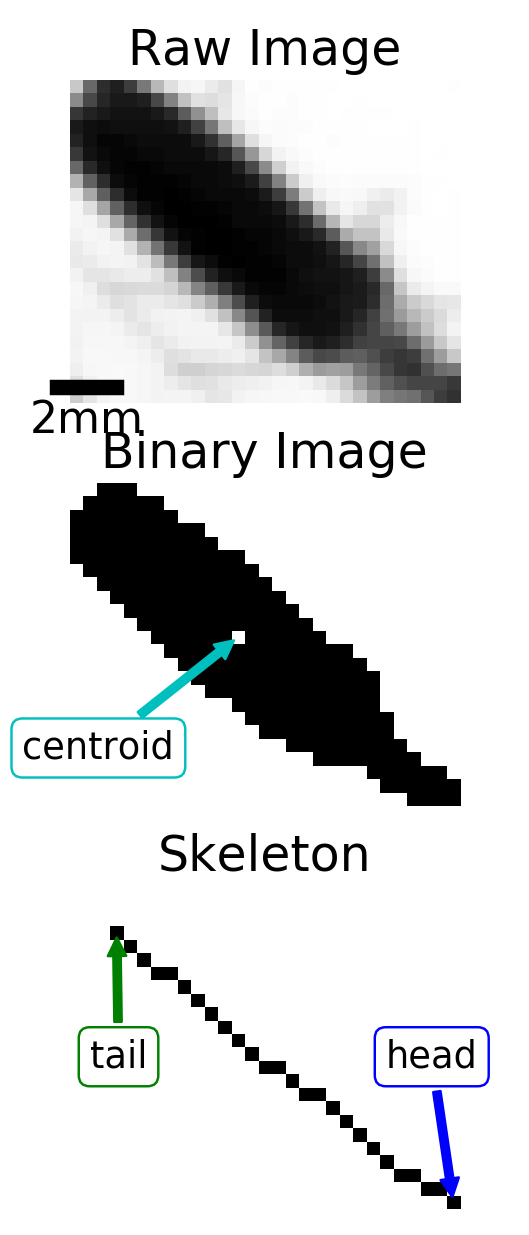

In [7]:
binary_image = binary_images[0:np.where(raw_images[:,:,image_number]!= False)[0][-1],
                               0:np.where(raw_images[:,:,image_number]!= False)[1][-1],image_number]
binary_image[int(actual_centroid[0]), int(actual_centroid[1])] = 0

fig = plt.figure(figsize=(3,7))
ax_left = fig.add_subplot(311)
ax_left.imshow(~raw_images[0:np.where(raw_images[:,:,image_number]!= False)[0][-1],
                          0:np.where(raw_images[:,:,image_number]!= False)[1][-1],image_number], cmap='Greys')
ax_left.set_title('Raw Image', fontsize=20)

ax_middle = fig.add_subplot(312)
ax_middle.imshow(binary_image, cmap='Greys')
ax_middle.set_title('Binary Image', fontsize=20)

ax_right = fig.add_subplot(313)
ax_right.imshow(skeletons[0:np.where(raw_images[:,:,image_number]!= False)[0][-1],
                          0:np.where(raw_images[:,:,image_number]!= False)[1][-1],image_number], cmap='Greys')
ax_right.set_title('Skeleton', fontsize=20)

ax_left.axis('off')
ax_middle.axis('off')
ax_right.axis('off')

fig.tight_layout()

# to be lazy...values can also be negative
cen_txt_x_displacement = -15
cen_txt_y_displacement = 8
head_txt_x_displacement = -5
head_txt_y_displacement = -10
tail_txt_x_displacement = -2
tail_txt_y_displacement = 10
midpt_txt_x_displacement = 7
midpt_txt_y_displacement = 0

annotation_centroid = ax_middle.annotate('centroid', xy=(actual_centroid[1], actual_centroid[0]), xycoords='data', 
                          xytext=(actual_centroid[0]+cen_txt_x_displacement, actual_centroid[1]+cen_txt_y_displacement), 
                            arrowprops=dict(arrowstyle="simple", color='c'), size=15,
                           bbox=dict(boxstyle="round", fc="w",ec="c"))


ax_right.annotate('head', xy=(actual_head[1], actual_head[0]), xycoords='data', 
                  xytext=(actual_head[1]+head_txt_x_displacement, actual_head[0]+head_txt_y_displacement), 
            arrowprops=dict(arrowstyle="simple", color='b'), size=15,
                  bbox=dict(boxstyle="round", fc="w",ec="b"))

ax_right.annotate('tail', xy=(actual_tail[1], actual_tail[0]), xycoords='data', 
                  xytext=(actual_tail[1]+tail_txt_x_displacement, actual_tail[0]+tail_txt_y_displacement), 
            arrowprops=dict(arrowstyle="simple", color='g'), size=15,
                  bbox=dict(boxstyle="round", fc="w", ec="g"))
"""
# This part would fill in the midpoint just to illustrate that the centroid is not the midpoints.
# This fills ups the plot quite a bit
ax_right.annotate('midpoint', xy=(midpoint[1], midpoint[0]), xycoords='data', 
                  xytext=(midpoint[1]+midpt_txt_x_displacement, midpoint[0]+midpt_txt_y_displacement), 
            arrowprops=dict(arrowstyle="simple", color='cyan'), size=15, 
                  bbox=dict(boxstyle="round", fc="w",ec="cyan"))
"""
#fig.text(0.8, 0.5, 'centroid', fontsize=14)
# add scalebar
fontprops = fm.FontProperties(size=18)
scalebar = AnchoredSizeBar(ax_left.transData,
                           2*pixel_per_mm, '2mm', 
                           'lower left',
                           pad=-1,
                           color='black',
                           frameon=False,
                           size_vertical=1,
                           fontproperties=fontprops)

ax_left.add_artist(scalebar)

#fig.subplots_adjust(right=0.79,wspace =0.90)
#fig.tight_layout()

os.chdir(home_path)
os.chdir(target_path)

if save_plots: 
    fig.savefig('Fig1S6c_firefly_defined.eps')